# Импорт файла, его разбор, анализ уникальных событий

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

with open('events.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data['events'])

df['event_type'] = df['signature'].apply(lambda x: x.split()[0] if ' ' in x else x)

df['timestamp'] = pd.to_datetime(df['timestamp'])

print("=== Общая информация о данных ===")
print(f"Всего записей: {len(df)}")
print(f"Период данных: с {df['timestamp'].min()} по {df['timestamp'].max()}")
print(f"Количество уникальных типов событий: {df['event_type'].nunique()}")
print()

=== Общая информация о данных ===
Всего записей: 100
Период данных: с 2023-08-21 08:00:00 по 2023-08-25 11:00:00
Количество уникальных типов событий: 4



# Распределение событий по типам

In [ ]:
event_distribution = df['event_type'].value_counts()

print("=== Распределение событий по типам ===")
for event_type, count in event_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"{event_type}: {count} событий ({percentage:.1f}%)")
print()


=== Распределение событий по типам ===
EXPLOIT: 44 событий (44.0%)
MALWARE-CNC: 23 событий (23.0%)
NETBIOS: 22 событий (22.0%)
INDICATOR-COMPROMISE: 11 событий (11.0%)



# Визуализация

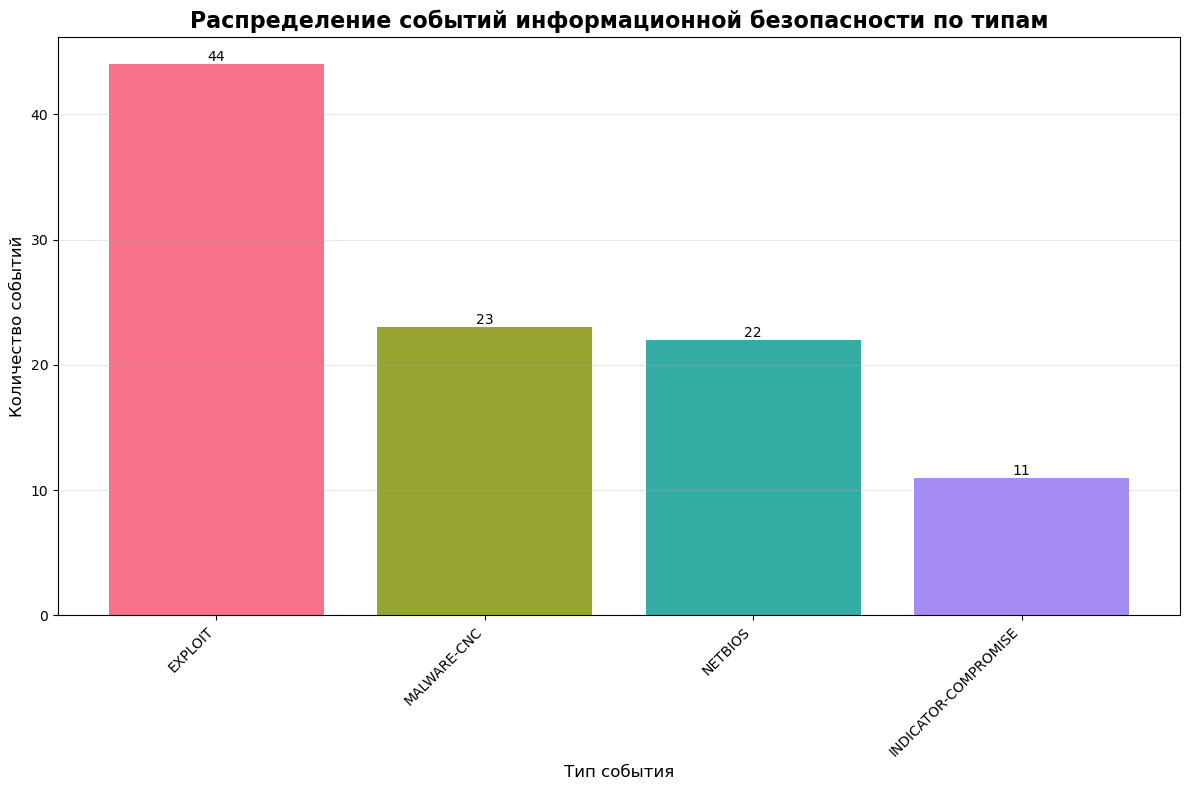

=== Количество событий по дням ===
date
2023-08-21    16
2023-08-22    24
2023-08-23    24
2023-08-24    24
2023-08-25    12
dtype: int64



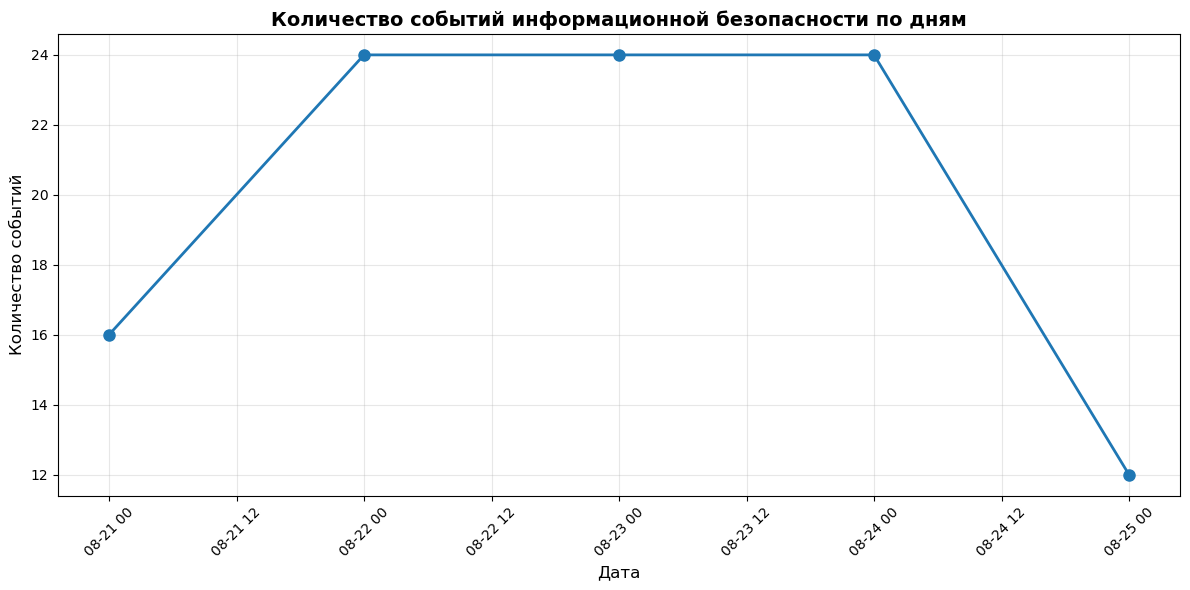

=== Первые 5 записей данных ===
            timestamp   event_type  \
0 2023-08-21 08:00:00  MALWARE-CNC   
1 2023-08-21 09:00:00      EXPLOIT   
2 2023-08-21 10:00:00      EXPLOIT   
3 2023-08-21 11:00:00      NETBIOS   
4 2023-08-21 12:00:00  MALWARE-CNC   

                                           signature  
0  MALWARE-CNC Win.Trojan.Jadtre variant outbound...  
1  EXPLOIT Remote Windows Win32k elevation of pri...  
2            EXPLOIT Java JRE to Oracle WebLogic RCE  
3          NETBIOS DCERPC NCACN-IP-TCP interfaces BO  
4  MALWARE-CNC User-Agent known malicious connect...  

=== Статистическая сводка ===
Всего дней: 5
Среднее количество событий в день: 20.0
Максимальное количество событий в день: 24
Минимальное количество событий в день: 12


In [ ]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", len(event_distribution))

bars = plt.bar(event_distribution.index, event_distribution.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Распределение событий информационной безопасности по типам', fontsize=16, fontweight='bold')
plt.xlabel('Тип события', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('security_events_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

print("=== Количество событий по дням ===")
df['date'] = df['timestamp'].dt.date
daily_counts = df.groupby('date').size()
print(daily_counts)
print()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=8)
plt.title('Количество событий информационной безопасности по дням', fontsize=14, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('security_events_daily.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== Первые 5 записей данных ===")
print(df[['timestamp', 'event_type', 'signature']].head())
print()

print("=== Статистическая сводка ===")
print(f"Всего дней: {df['date'].nunique()}")
print(f"Среднее количество событий в день: {len(df) / df['date'].nunique():.1f}")
print(f"Максимальное количество событий в день: {daily_counts.max()}")
print(f"Минимальное количество событий в день: {daily_counts.min()}")